Saving cleaned_weather.csv to cleaned_weather (3).csv
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1318/1318 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.0101 - val_loss: 6.2572e-05
Epoch 2/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 1.3860e-04 - val_loss: 7.1585e-05
Epoch 3/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 1.1079e-04 - val_loss: 3.8952e-05
Epoch 4/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 8.6462e-05 - val_loss: 3.6134e-05
Epoch 5/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 6.7571e-05 - val_loss: 2.7510e-05
Epoch 6/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - loss: 5.2551e-05 - val_loss: 4.2320e-05
Epoch 7/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 4.2575e-05 - val_loss: 3.5060e-05
Epoch 8/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 4.3211e-05 - val_loss: 3.9884e-05
Epoch 9/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - loss: 4.1872e-05 - val_loss: 3.3660e-05
Epoch 10/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 4.0247e-05 - val_loss: 4.5570e-05
Epoch 11/20
1318/1318 ━━━━━━━━━━━━

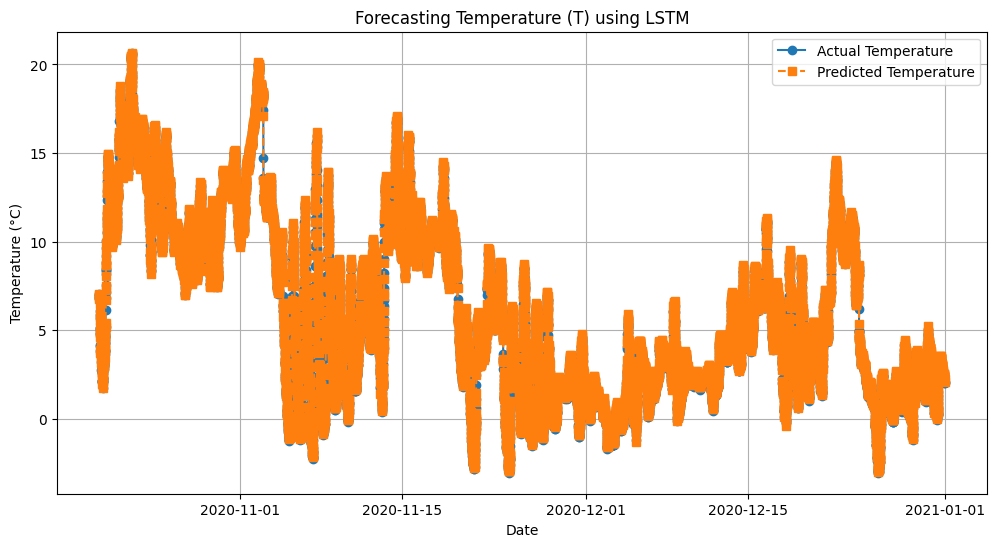

In [4]:
# Install TensorFlow if not already
!pip install tensorflow --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("cleaned_weather.csv")

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort and set datetime as index
df = df.sort_values('date')
df.set_index('date', inplace=True)

# Target: 'T' (Temperature)
target_column = 'T'

# Normalize the data
scaler = MinMaxScaler()
df['T_scaled'] = scaler.fit_transform(df[[target_column]])

# Function to create sequences
def create_dataset(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Create input-output sequences
time_steps = 10
X, y = create_dataset(df['T_scaled'].values, time_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split (no shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict
y_pred = model.predict(X_test)

# Inverse scale
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(12, 6))
date_range = df.index[-len(y_test):]  # Only show the range of test predictions

plt.plot(date_range, y_test_actual, label="Actual Temperature", marker='o')
plt.plot(date_range, y_pred_actual, label="Predicted Temperature", linestyle='dashed', marker='s')
plt.title("Forecasting Temperature (T) using LSTM")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
